# Practice Exercise Linear Regression

## Case Study: Boston Housing Price Prediction

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 dollars
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    %lower status of the population
- MEDV:     Median value of owner-occupied homes in 1000 dollars.

### Concepts to cover
- <a href= "#link1">1.EDA </a>
- <a href= "#link2">2.Splitting the data </a>
- <a href= "#link3">3.Modelling </a>
- <a href= "#link4">4.Bonus: Statsmodel based impementation </a>


**Importing Libraries**

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### <a id = "link1">Load the dataset</a>

In [2]:
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Check the shape of the dataset**

In [3]:
df.shape

(506, 13)

**Get the info data types column wise**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Univariate and Bivariate Analysis
To do - Identify insights if any from the distributuions.

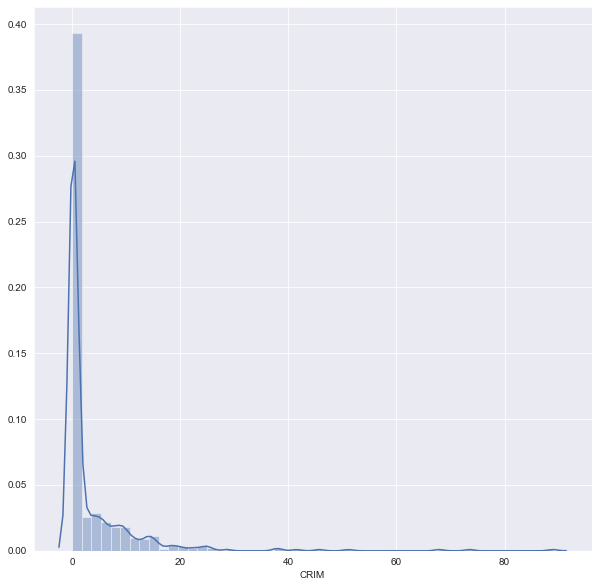

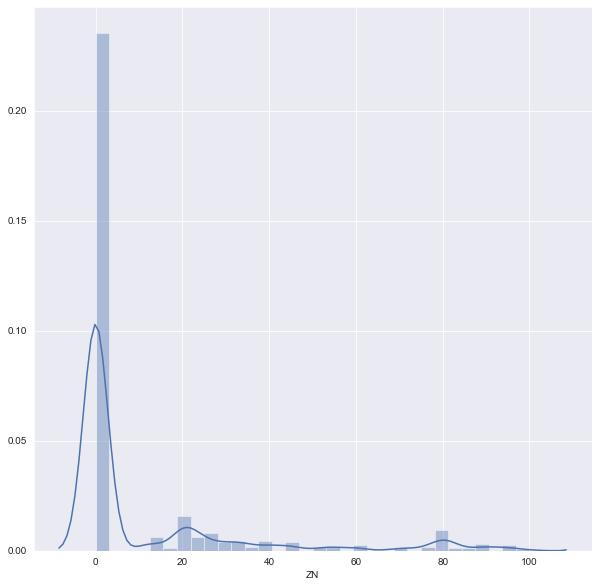

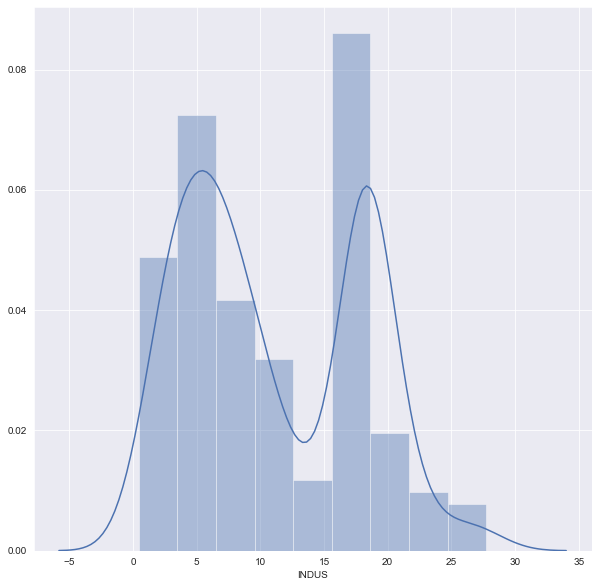

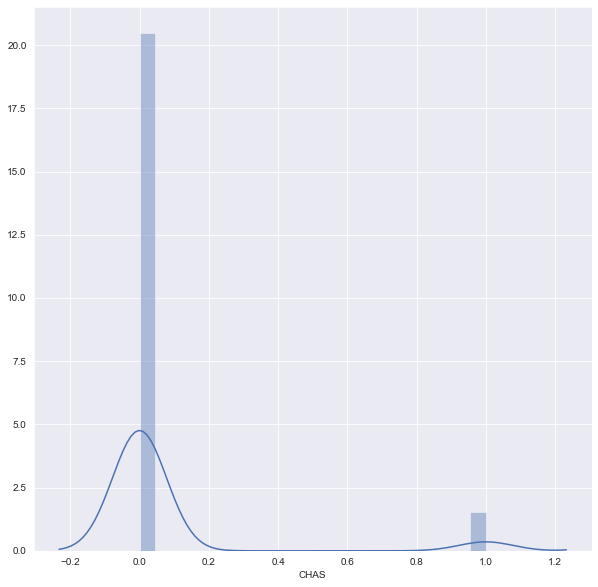

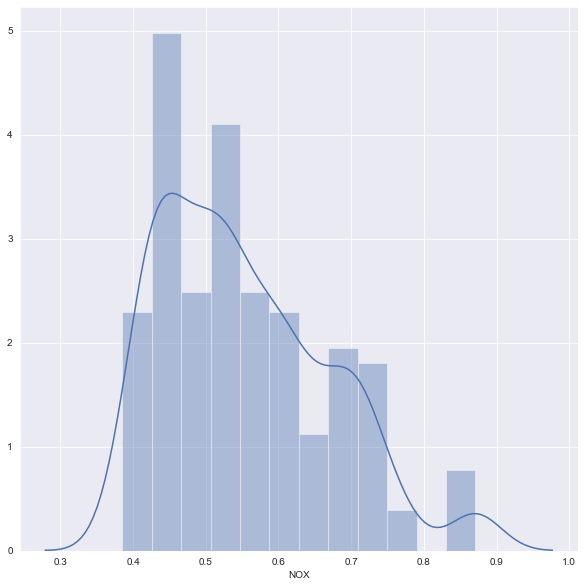

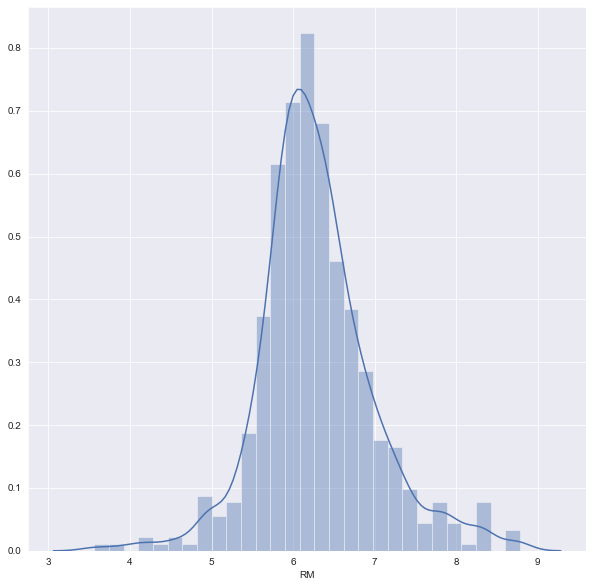

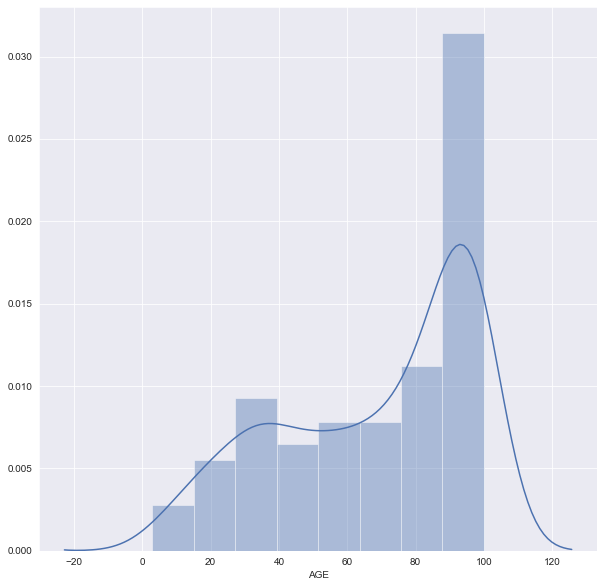

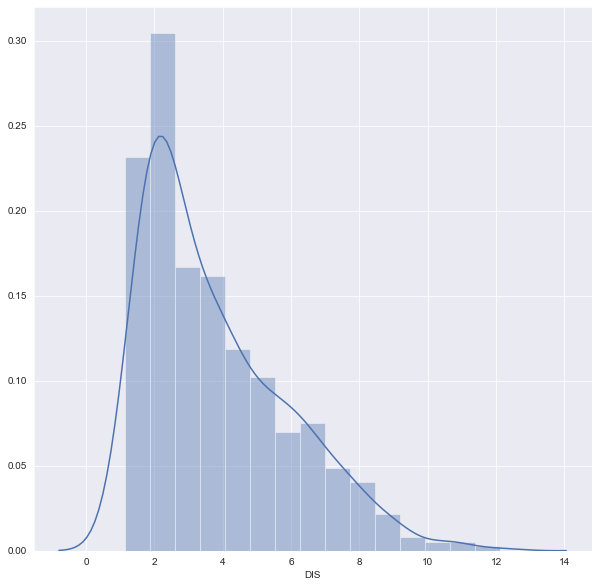

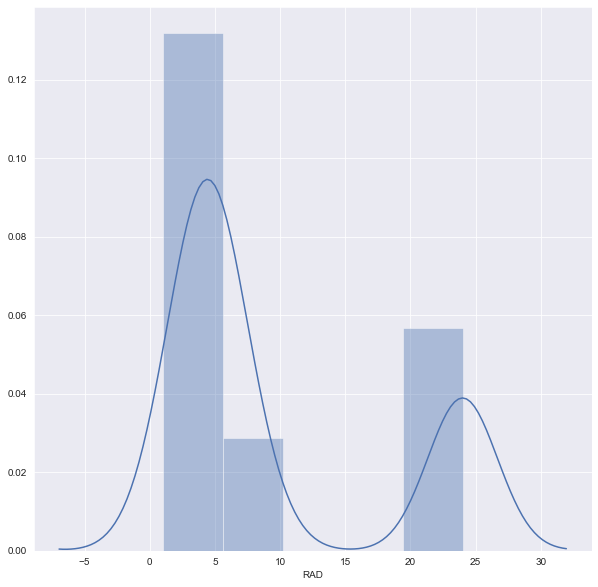

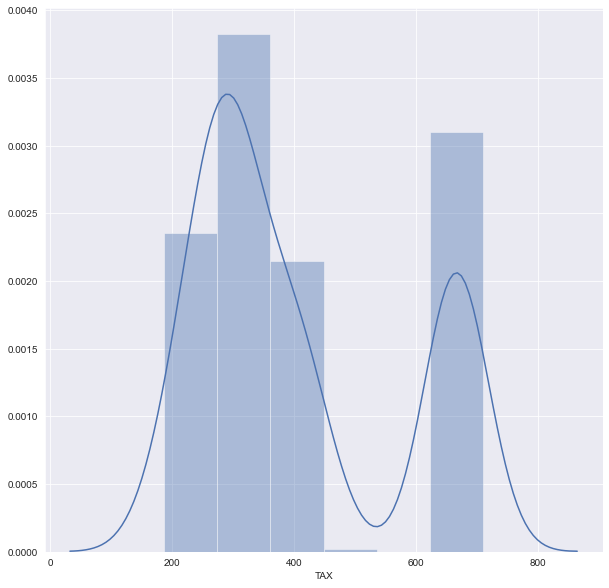

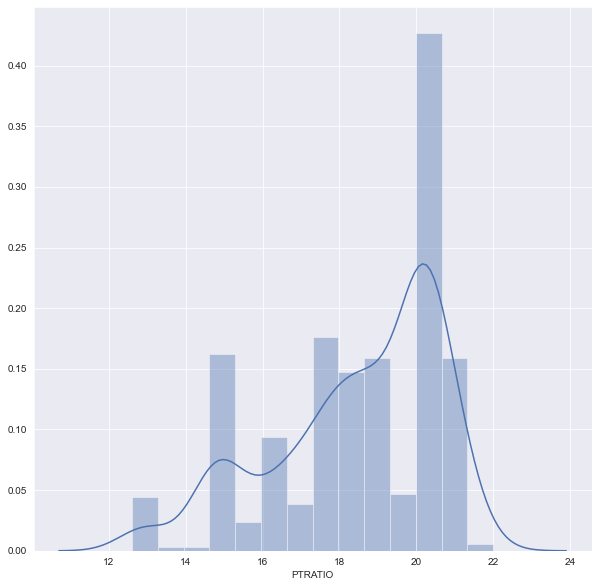

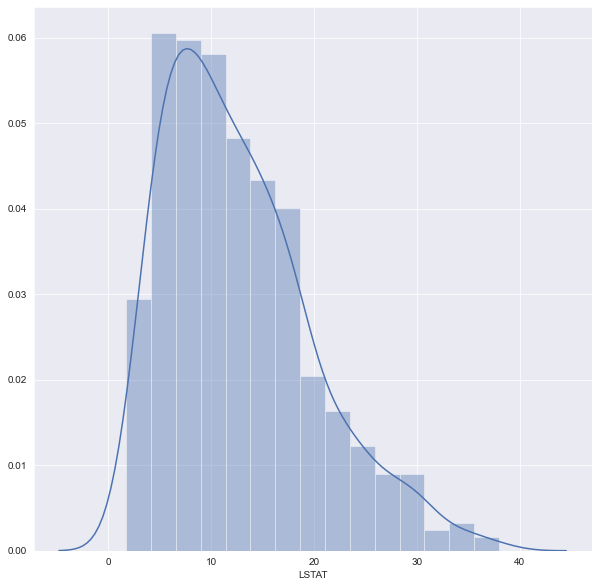

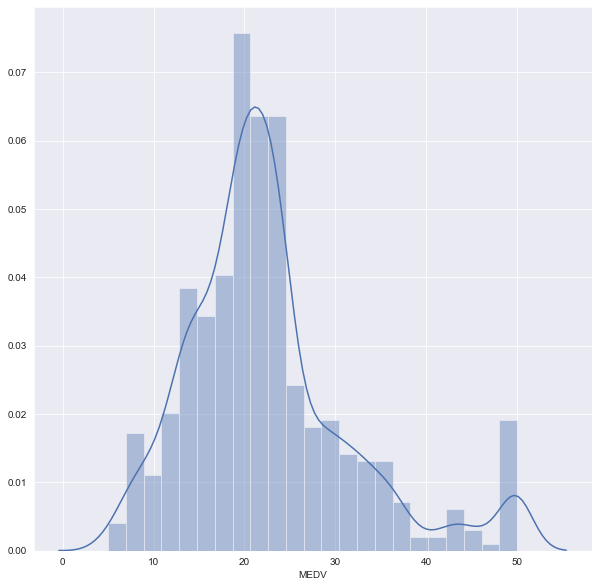

In [7]:
# let us plot all the columns to look at their distributions

import seaborn as sns
for i in df.columns:
    sns.set({'figure.figsize': (10,10)})
    sns.distplot(df[i], kde=True)
    plt.show()

**Insights**
- RM variable is noramlly distributed with mean 6.2 and std 0.7. This means that most houses have 6-7 rooms, number of houses with less than 6-7 rooms is approx equal number of houses with greater than 6-7 rooms and extremly less/more number of rooms occur infrequently.
- MEDV is close to normal distribution. What is does it mean?
- CHAS has most of the values equal to 0 which means most of the places have no tracts bounding river.
- PRATIO is skewed to the left, which means number of students per teacher is high in most of the areas.
- Many varaibles like DIS, CRIM, LSTAT are skewed to the right. What does it mean?

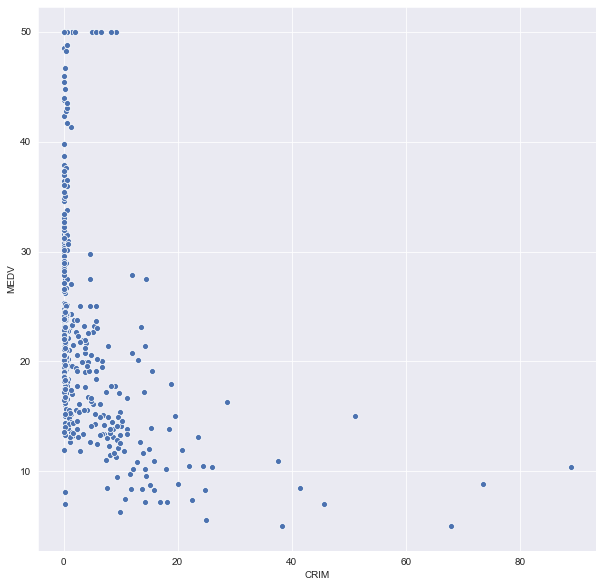

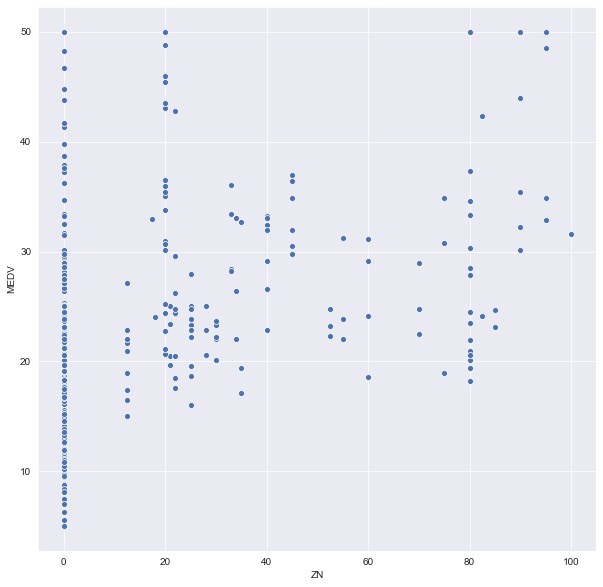

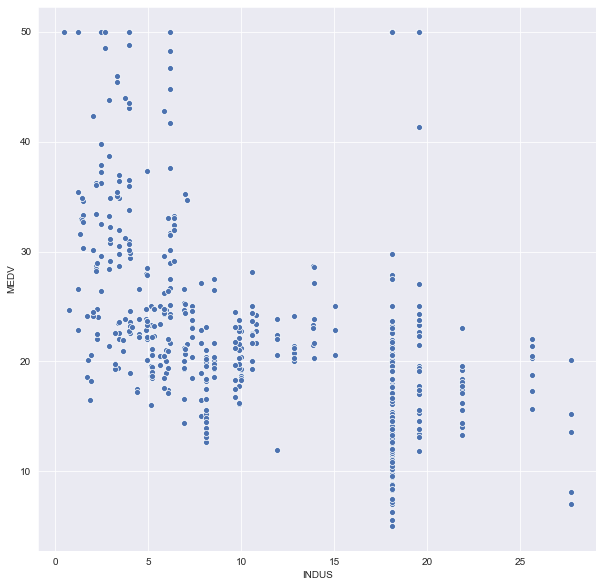

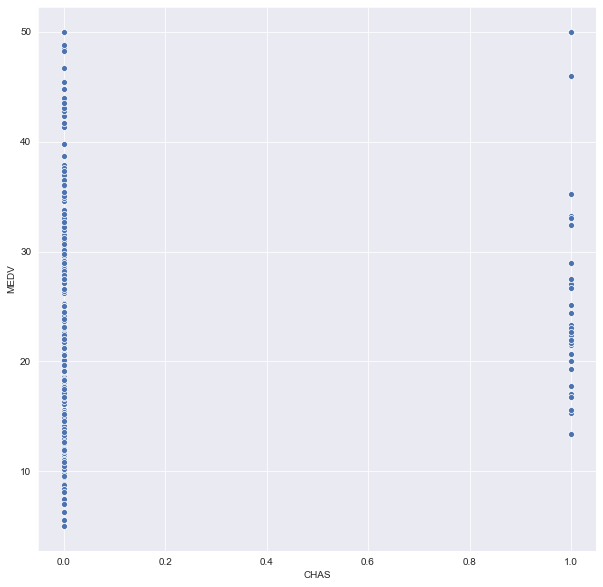

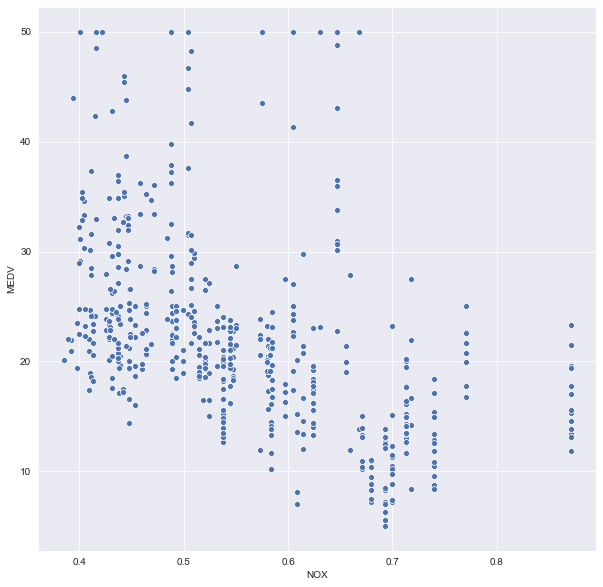

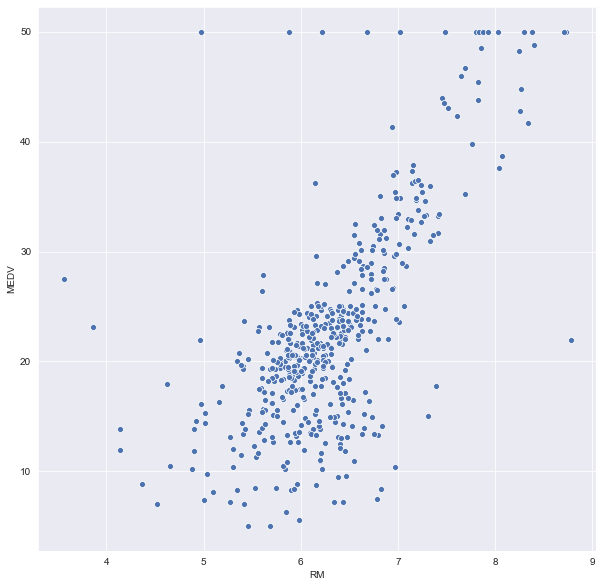

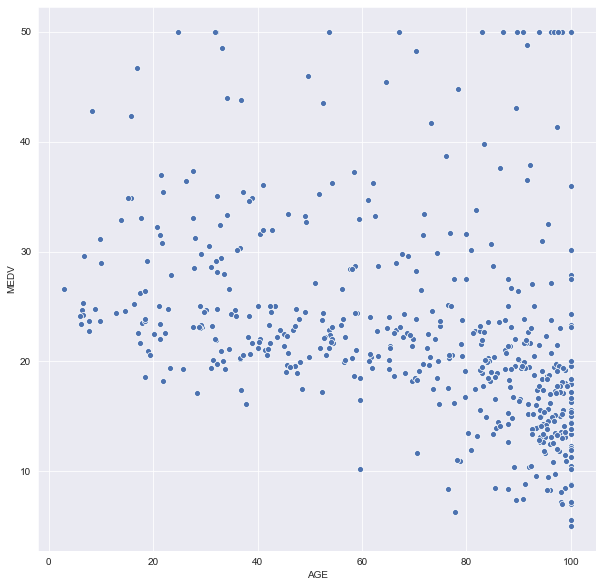

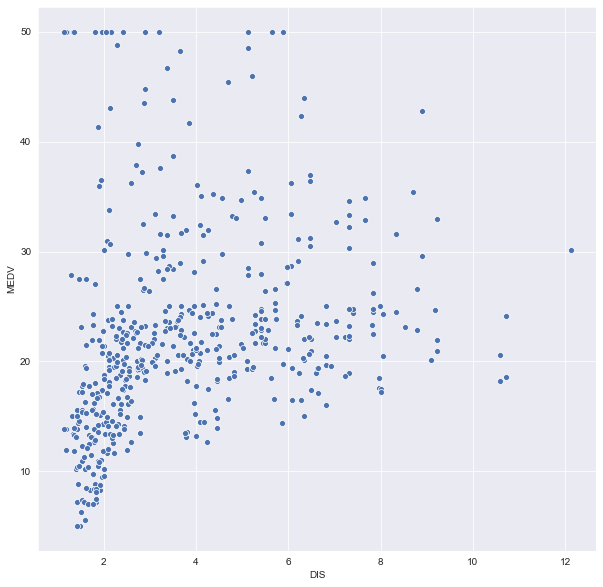

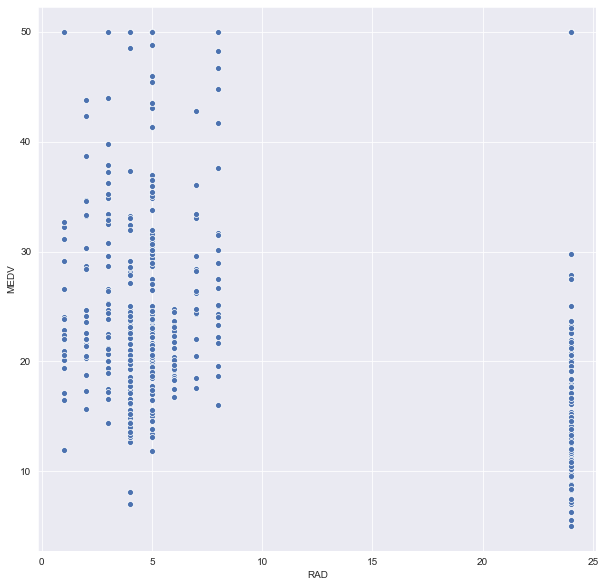

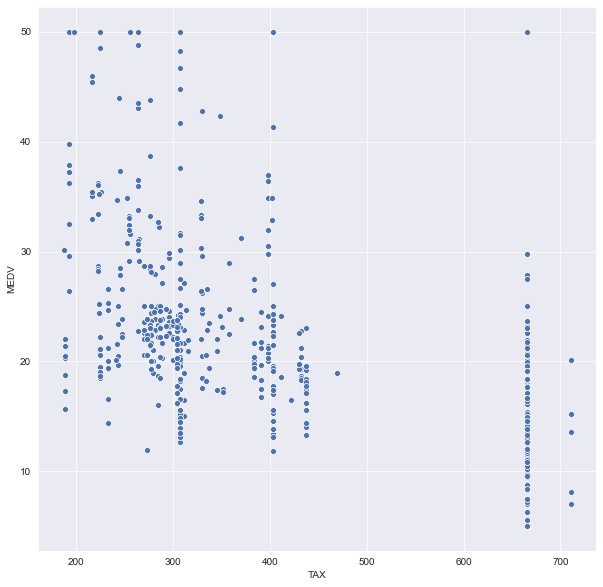

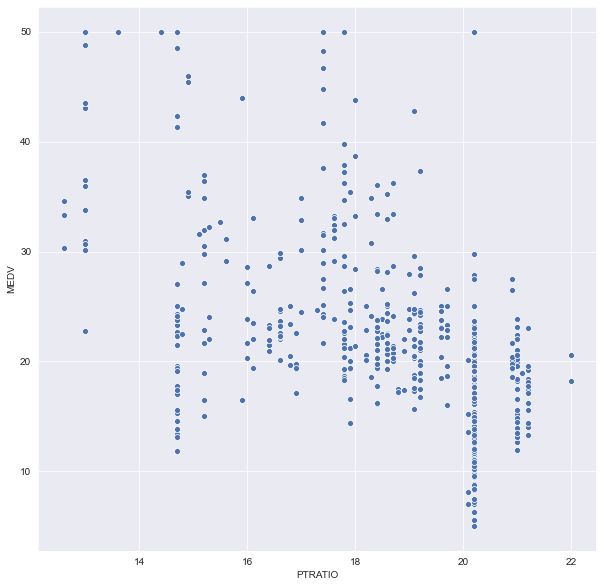

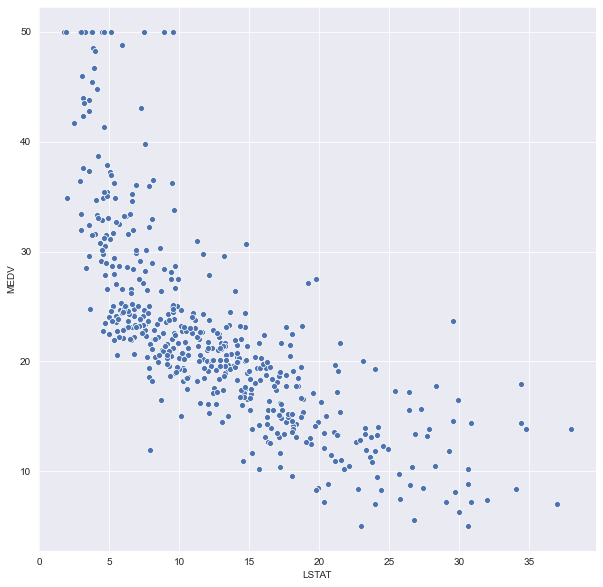

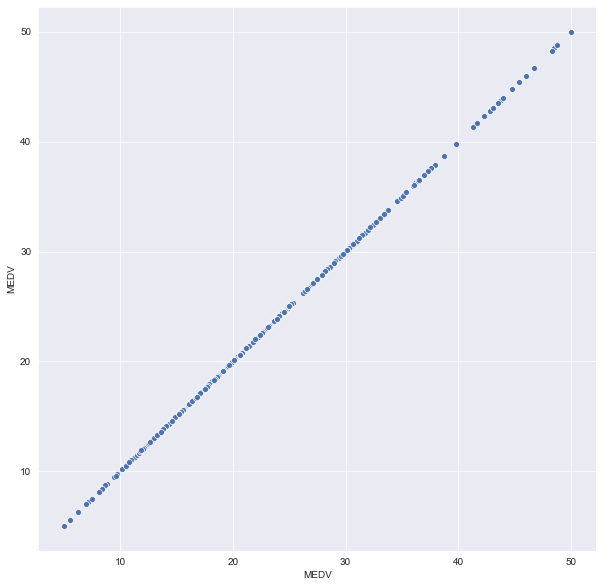

In [8]:
#Bivariate Scatterplot of Prices with all the features
for i in df.columns:
    plt.figure(figsize = (10,10))
    sns.scatterplot(x = df[i], y = df['MEDV'])
    plt.show()                

**Get the summary statistics of the numerical columns of the dataset**

**Get the Correlation Heatmap**

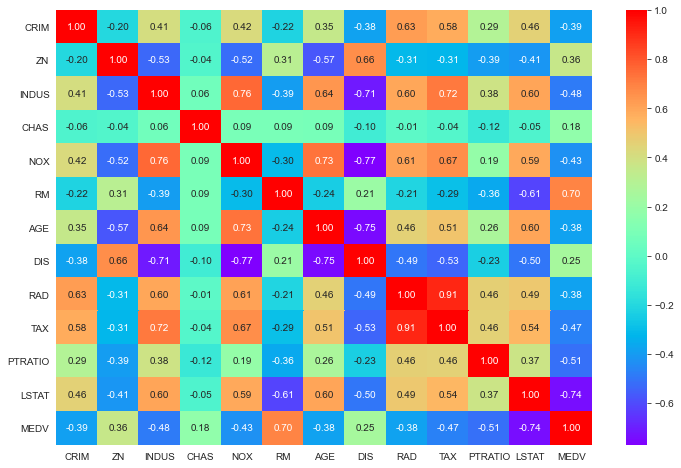

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

**Insights**
- We can see a negative correlation between NOX concentraation in air and price. The more/less concentration of NOX is in air the less/more the housing prices.
- We can see a strong negative correlation between lower status population and price. Population of lower status increases/decreases with decrease/increase in price.
- We can see a strong negative correlation between PRATIO from town and price. The higher/lower the pupil-teacher ratio the less/more the housing prices.
- We can see a strong postive correlation between number of rooms and price. The higher the number of rooms the higher is the housing price.

In [10]:
# Let us create a new feature using the TAX and RAD.
df['Rad/Tax'] = df['RAD']/df['TAX']

### <a id = "link2">Split the dataset</a>
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [11]:
Y = df['MEDV']
X = df.drop(columns = {'MEDV'})

In [12]:
#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

### <a id = "link3">Using Linear Model from Scikit learn library</a>

**Fit the model to the training set**

In [13]:
#intialise the model to be fit and fir the model on the train data
regression_model = LinearRegression(fit_intercept=True)
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Get the score on training set**

In [14]:
#get the R-square score the fitted train data

print('The coefficient of determination R^2 of the prediction on Train set', regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.7077132931309867


In [15]:
# write your own R-square function for the testing data

def r_squared(model, X, y):
    y_mean = y_train.mean()
    SST = ((y_train - y_mean)**2).sum()
    SSE = ((y_train - regression_model.predict(X_train))**2).sum()
    r_square = 1 - SSE/SST
    return SSE, SST, r_square
    
SSE, SST, r_square = r_squared(regression_model, X_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("r_square: ", r_square)

SSE:  8400.59131142169
SST:  28740.928389830508
r_square:  0.7077132931309869


**Get the score on test set**

In [16]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.7747487100790003


**Get the RMSE on test set**

In [17]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 4.543708996703926


**Get model Coefficients**

In [18]:
a = regression_model.coef_
coeff_data = pd.DataFrame()
coeff_data['Coefs'] = regression_model.coef_
coeff_data['Feature'] = X_train.columns
coeff_data = coeff_data.append({'Coefs': regression_model.intercept_, 'Feature': "Intercept"}, ignore_index = True)
coeff_data

,Coefs,Feature
0,-0.111646,CRIM
1,0.063623,ZN
2,0.058160,INDUS
3,2.481265,CHAS
4,-22.288445,NOX
5,2.705046,RM
6,0.004333,AGE
7,-1.553844,DIS
8,0.163573,RAD
9,-0.008756,TAX


In [19]:
# Let us write the equation of the fit
Equation = "Price ="
print(Equation, end='\t')
for i in range(0, 13):
    if(i!=12):
        print("(",coeff_data.iloc[i].Coefs,")", "*", coeff_data.iloc[i].Feature, "+", end = '  ')
    else:
        print(coeff_data.iloc[i].Coefs)

Price =	( -0.11164557348700889 ) * CRIM +  ( 0.06362260291545442 ) * ZN +  ( 0.058160178065532156 ) * INDUS +  ( 2.4812645928411374 ) * CHAS +  ( -22.28844492809701 ) * NOX +  ( 2.705045969347972 ) * RM +  ( 0.004333206124680149 ) * AGE +  ( -1.5538441948939086 ) * DIS +  ( 0.16357314875580833 ) * RAD +  ( -0.008756354173498793 ) * TAX +  ( -0.9766725794264204 ) * PTRATIO +  ( -0.5846333698546037 ) * LSTAT +  72.92287256820451


## <a id = "link4">Bonus: Using Statsmodels OLS</a>

In [20]:
# This adds the constant term beta0 to the Linear Regression.
X_con=sm.add_constant(X)
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_con, Y, test_size=0.30 , random_state=1)

**Make the linear model using OLS**

In [21]:
model = sm.OLS(y_trainc,X_trainc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     63.33
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.66e-82
Time:                        11:26:05   Log-Likelihood:                -1062.8
No. Observations:                 354   AIC:                             2154.
Df Residuals:                     340   BIC:                             2208.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3960      6.555      7.383      0.000      35.502      61.290
CRIM          -0.1116      0.043     -2.585      0.010      -0.197      -0.027
ZN             0.0636      0.019      3.344      0.001       0.026       0.101
INDUS          0.0582      0.077      0.751      0.453      -0.094       0.210
CHAS           2.4813      0.986      2.517      0.012       0.542       4.421
NOX          -22.2884      4.700     -4.742      0.000     -31.534     -13.043
RM             2.7050      0.521      5.191      0.000       1.680       3.730
AGE            0.0043      0.017      0.261      0.795      -0.028       0.037
DIS           -1.5538      0.260     -5.972      0.000      -2.066      -1.042
RAD            0.1636      0.232      0.705      0.481      -0.293       0.620
TAX           -0.0088      0.007     -1.344      0.180      -0.022       0.004
PTRATIO       -0.9767      0.173     -5.650      0.000      -1.317      -0.637
LSTAT         -0.5846      0.062     -9.500      0.000      -0.706      -0.464
Rad/Tax       72.9229    115.940      0.629      0.530    -155.127     300.973
==============================================================================
Omnibus:                      135.944   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.381
Skew:                           1.641   Prob(JB):                    1.53e-121
Kurtosis:                       8.191   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Get the value of coefficient of determination**

In [22]:
print('The variation in the independent variable which is explained by the dependent variable is','\n',
      model.rsquared*100,'%')

The variation in the independent variable which is explained by the dependent variable is 
 70.77132931309866 %


**Get the Predictions on test set**

In [22]:
ypred = model.predict(X_testc)

**Calculate MSE for training set**

In [23]:
mse = mean_squared_error(y_trainc,model.predict(X_trainc))
mse

23.730483930569743

**Get the RMSE on training set**

In [24]:
print("The Root Mean Square Error (RMSE) of the model for Training set is",np.sqrt(mse))

The Root Mean Square Error (RMSE) of the model for Training set is 4.871394454421623


**Get the RMSE on test set**

In [25]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,ypred)))

The Root Mean Square Error (RMSE) of the model is for testing set is 4.5437089967038435


In [25]:
np.corrcoef(x,y)